In [1]:
import platform

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
from matplotlib import font_manager, rc

In [4]:
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
else:
    print("It's unknown system. Hangul fonts are not supported!")
    
# plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["figure.figsize"] = [12,6] 
#rcParams : 그림의 가로, 세로 크기를 설정해둠으로써, 매번 설정하지 않아도 된다.


%matplotlib inline

In [5]:
df = pd.read_csv('public_seoul_cctv_2020.csv', encoding='euc-kr')
df.tail(10)

,경찰서,개소,대수
22,구로,695,"1,691"
23,서초,344,"1,079"
24,양천,763,"2,234"
25,송파,675,779
26,노원,"1,288","1,416"
27,방배,236,830
28,은평,339,"1,058"
29,도봉,472,485
30,수서,677,"1,856"
31,총계,"16,603","33,523"


In [6]:
df.set_index("경찰서", inplace= True)  #경찰서 컬럼을 index 로 설정한다.
df.tail()

,개소,대수
경찰서,,
방배,236,830
은평,339,"1,058"
도봉,472,485
수서,677,"1,856"
총계,"16,603","33,523"


In [10]:
# 총계라는 컬럼을 없애기 위해서

df = df.drop(df.index[-1])  #df.index[-1] 하면 총계라고 출력됨(index가져오는거니까)
df.tail(3)

,개소,대수
경찰서,,
은평,339,"1,058"
도봉,472,485
수서,677,"1,856"


In [30]:
# 문자 -> 숫자로 변환

for n in np.arange(len(df)):
    df['개소'].values[n] = int(df['개소'].values[n].replace(',',''))
    df['대수'].values[n] = int(df['대수'].values[n].replace(',',''))
    
     #df[컬럼명].values[idx] -> (idx행, 해당컬럼명)의 값이 나온다. 
    

In [38]:
df_sort = df.sort_values("대수", ascending=False)
df_sort.head(4)

,개소,대수
경찰서,,
양천,763,2234
용산,632,1897
수서,677,1856
관악,1042,1804


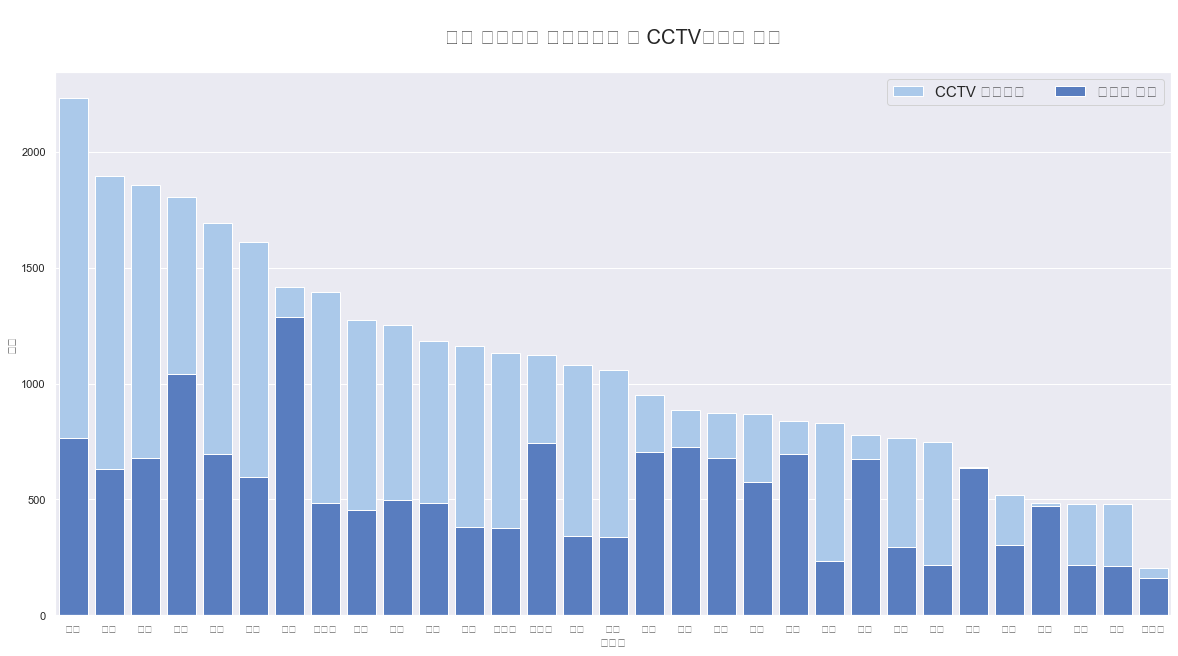

In [59]:
plt.figure(figsize=(20,10))

sns.set_color_codes('pastel')
sns.barplot(x=df_sort.index, y = df_sort['대수'], color="b", label = 'CCTV 설치대수')

sns.set_color_codes("muted")
sns.barplot(x=df_sort.index, y = df_sort['개소'], color="b", label = '파출소 개소')

# cctv 설치대수를 먼저 그린후에 ( 값이 더 크기때문에 )
# 그 다음, 그 위에 파출소 개수를 한번 더 그려준다. ( 엎어치기 )

plt.legend(ncol = 2, loc = 1, fontsize=15, frameon=True)
# legend -> loc 는 위치를 의미 /  ncol이 2이므로 2개의 열로 표시됨
#plt.legend(ncol = 1, loc = 2, fontsize=15, frameon=True)

plt.title('\n 관할 경찰서별 파출소개소 및 CCTV설치수 현황 \n', fontsize=20)

plt.show()

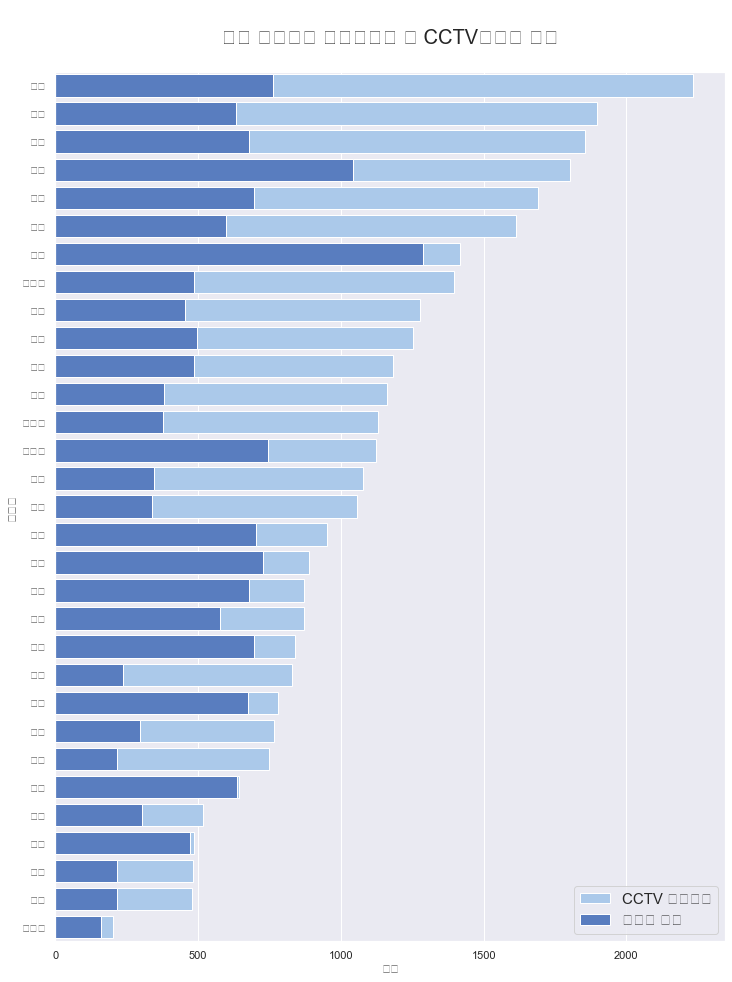

In [62]:
plt.figure(figsize=(12,16))

sns.set_color_codes("pastel")
sns.barplot(x = df_sort['대수'], y=df_sort.index, color='b',label='CCTV 설치대수')

sns.set_color_codes("muted")
sns.barplot(x=df_sort['개소'], y=df_sort.index, color="b", label='파출소 개소')


plt.legend(ncol=1, loc=4, fontsize=15, frameon=True)
plt.title('\n 관할 경찰서별 파출소개소 및 CCTV설치수 현황 \n', fontsize=20)

plt.show()

In [75]:
#explode = []
#for i in range(len(df_cctv)):
#    if df_cctv[i] == df_cctv.max():
#        explode.append(0.2)
#    else:
#        explode.append(0)

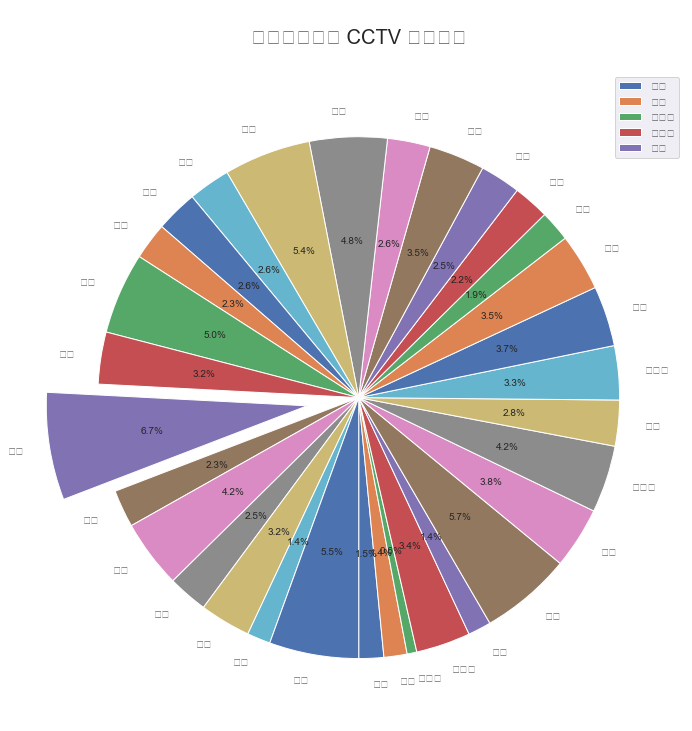

In [82]:
plt.figure(figsize=(12,12))

df_cctv = df['대수']
explode = [0.2 if df_cctv[i] == df_cctv.max() else 0 for i in range(len(df_cctv))]
  #이렇게 씀으로써 최대값일때만 0.2 가 나오고 나머진 0으로 나온다.


plt.pie(df_cctv,
       explode = explode,
       labels = df_cctv.index,
       autopct = '%.1f%%', 
       shadow = False,
       startangle = 270
       )

plt.legend(df_cctv.index[:5], loc=1) # top5개만 표현
plt.title("\n관할경찰서별 CCTV 설치대수\n", fontsize=20)

plt.show()

In [83]:
# df_cctv = df['대수']
# explode = [ 0.2 if df_cctv[i]==df_cctv.max() else 0 for i in range(len(df_cctv)) ]

# df_cctv.plot(kind='pie', 
#              figsize=(20, 15), 
#              autopct='%.2f%%', 
#              shadow=False, 
#              startangle=-90,
#              explode = explode,
#             )
# plt.axis('equal')
# plt.legend(df_cctv.index[:5], loc=1)
# plt.title("\n관할경찰서별 CCTV 설치대수\n", fontsize=20)

# plt.show()

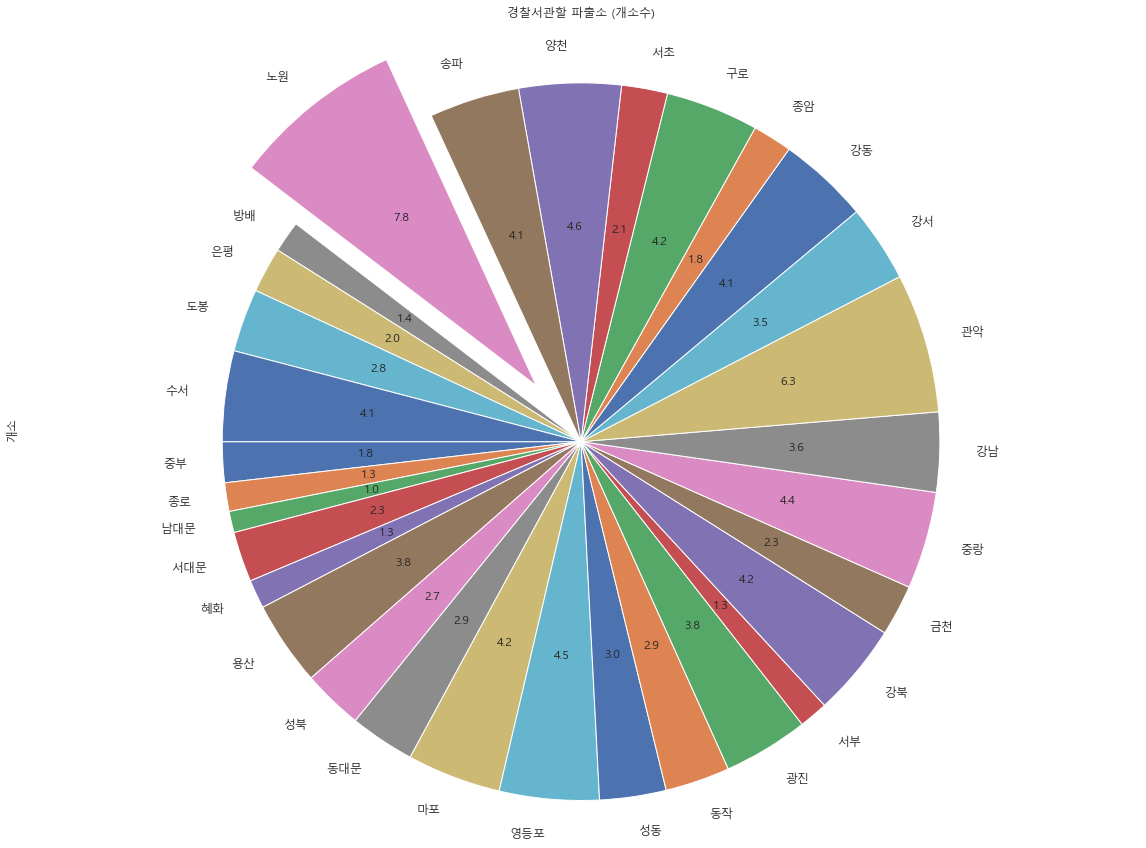

In [18]:
df_pbox = df['개소']
explode = [ 0.2 if df_pbox[i]==df_pbox.max() else 0 for i in range(len(df_pbox)) ]

df_pbox.plot(kind='pie', 
             title='경찰서관할 파출소 (개소수)',
             figsize=(20, 15), 
             fontsize=12, 
             autopct='%1.1f', 
             shadow=False, 
             startangle=180,
             explode = explode,
            )
plt.axis('equal')
plt.show()

In [84]:
def draw_barplot(param='v'):  #함수로 써두면 아래에서 함수만 호출하면 된다.  
    
    if param == 'h':        
        sns.set_color_codes("pastel")
        sns.barplot(x = df_sort['대수'], y = df_sort.index, color="b", label='CCTV 설치대수')

        sns.set_color_codes("muted")
        sns.barplot(x = df_sort['개소'], y = df_sort.index, color="b", label='파출소 개소')

        plt.legend(ncol=2, loc=4, frameon=True, fontsize=15)
    
    else:
        sns.set_color_codes("pastel")
        sns.barplot(x = df_sort.index, y = df_sort['대수'], color="b", label='CCTV 설치대수')

        sns.set_color_codes("muted")
        sns.barplot(x = df_sort.index, y = df_sort['개소'], color="b", label='파출소 개소')

        plt.legend(ncol=2, loc=1, frameon=True, fontsize=15)
        
    
    
def draw_pieplot(param):
    if param == 'CCTV':
        df_cctv = df['대수']
        explode = [ 0.2 if df_cctv[i]==df_cctv.max() else 0 for i in range(len(df_cctv)) ]

        df_cctv.plot(kind='pie', 
                     title='경찰서관할 CCTV (설치대수)',
                     fontsize=9, 
                     autopct='%.2f%%', 
                     shadow=False, 
                     startangle=-90,
                     explode = explode,
                    )
        # plt.axis('equal')
        # plt.show()
    elif param == 'PBOX':
        df_pbox = df['개소']
        explode = [ 0.2 if df_pbox[i]==df_pbox.max() else 0 for i in range(len(df_pbox)) ]

        df_pbox.plot(kind='pie', 
                     title='경찰서관할 파출소 (개소수)',
                     fontsize=12, 
                     autopct='%1.1f', 
                     shadow=False, 
                     startangle=180,
                     explode = explode,
                    )
    else :
        print("Not Operation !!")
        return 
    
    plt.axis('equal')
    # plt.show()
    
    
    


    
#함수화 함으로써 밑에서 subplot 사용할때 함수이름만 호출하면 된다.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50577 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 52380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49328 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49436 missing from c

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 50577 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 52380 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 49328 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 49436 missing from current fon

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 54624 missing from current font.
  font.set_text(s, 0, flags=flags)


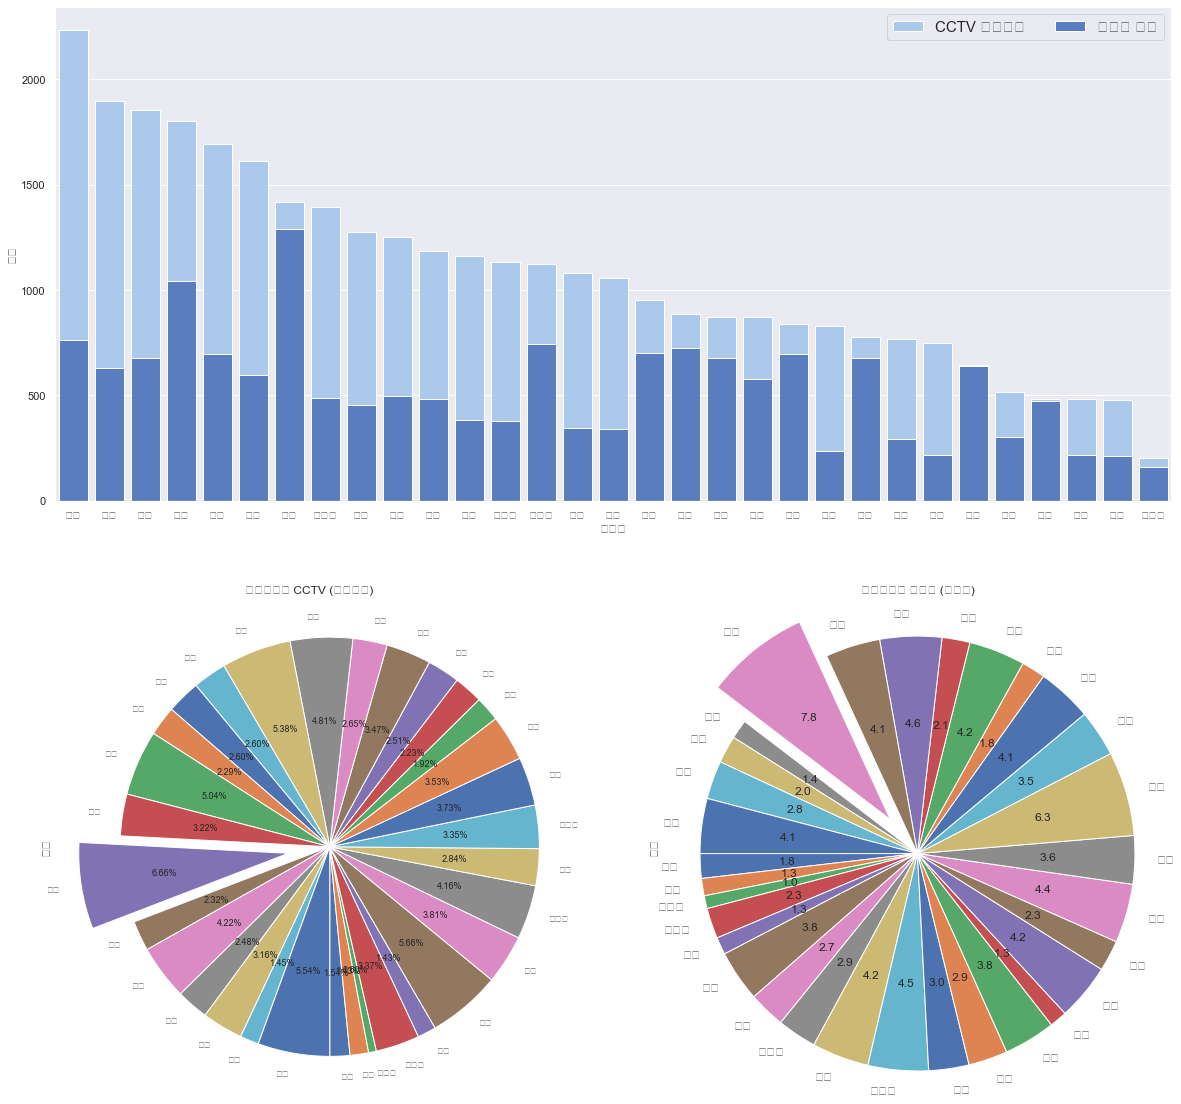

In [86]:
plt.figure(figsize=(20,20))

plt.subplot(211) 
draw_barplot(param='v')  #위에서 함수화 했기때문에 함수이름만 호출하면 됨
#draw_barplot(param='h')

plt.subplot(223) 
draw_pieplot('CCTV')

plt.subplot(224)
draw_pieplot('PBOX')

plt.show()